# Fraction upregulated screen 

Import everything from the imports notebook. This reads in all of the expression data as well as the functions needed to analyse differential expression data.

In [1]:
import NotebookImport
from Imports import *

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

__matched_meth__ is our matched methylation data.  

In [3]:
matched_meth = pd.read_hdf(METH_STORE, 'matched_tn')
matched_meth = matched_meth.groupby(axis=1, level=[0,1]).first()

In [4]:
matched_meth.T.head(10).T.head()

TCGA-05-5420        TCGA-18-3417        TCGA-18-4721        TCGA-18-5592        TCGA-18-5595      
                      01    11            01    11            01    11            01    11            01    11
cg00000029          0.40  0.23          0.23  0.18          0.31  0.24          0.17  0.25          0.16  0.16
cg00000165          0.20  0.18          0.51  0.15          0.40  0.15          0.74  0.14          0.80  0.18
cg00000236          0.79  0.85          0.91  0.85          0.87  0.88          0.91  0.90          0.90  0.89
cg00000289          0.63  0.64          0.73  0.77          0.64  0.81          0.67  0.76          0.74  0.77
cg00000292          0.73  0.69          0.67  0.69          0.77  0.68          0.51  0.68          0.59  0.69

In [5]:
matched_meth.shape[1] / 2

629

Read in matched Gene and miRNA expression data.

In [6]:
matched_rna = matched_tn
matched_mir = pd.read_hdf(MIRNA_STORE, 'matched_tn')

### Run a simple screen for DX genes 
* Here we take the matched data and run a basic screen
* fc = 1 means that we have no foldchange buffer for a gene to be considered over or underexpressed in a patient 
* If there are ties or missing data, I omit these from the test.  This can cause underpowered tests which have extreme test statistics but weak p-values.  For this reason I filter all gene/probes/markers with a sample size of less than 300 patients.

In [7]:
dx_rna = binomial_test_screen(matched_rna, fc=1.)
dx_rna = dx_rna[dx_rna.num_dx > 300]

In [10]:
dx_rna.sort('p').head(10)

,num_ox,num_dx,frac,p
PKMYT1,618,649,0.95,8.00e-143
UBE2C,617,649,0.95,1.55e-141
IQGAP3,617,649,0.95,1.55e-141
ASF1B,616,649,0.95,2.90e-140
ADH1B,34,649,0.05,5.26e-139
MELK,615,649,0.95,5.26e-139
CDT1,615,649,0.95,5.26e-139
SEMA5B,615,649,0.95,5.26e-139
TPX2,613,649,0.94,1.58e-136
SPC24,613,649,0.94,1.58e-136


In [9]:
dx_rna.ix['FOXM1']

num_ox     6.03e+02
num_dx     6.49e+02
frac       9.29e-01
p         7.59e-125
Name: FOXM1, dtype: float64

Not only is ADH1B the most downregulated gene, but many of the other genes in the ADH familly have large effects as well. I go into this with a bit more depth in the [alcohol_metabolism](./alcohol_metabolism.ipynb) Notebook.

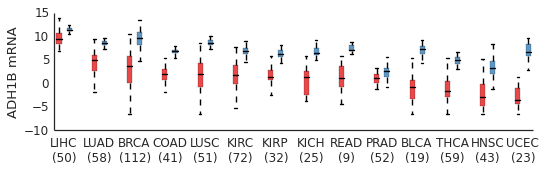

In [11]:
#Do not import
fig, ax = subplots(figsize=(7.75,2.5))
paired_bp_tn_split(matched_rna.ix['ADH1B'], codes, data_type='mRNA',
                   ax=ax)
fig.tight_layout()

In [8]:
dx_rna.ix[['ADH1A','ADH1B','ADH1C']]

,num_ox,num_dx,frac,p
ADH1A,38,649,0.06,4.24e-134
ADH1B,34,649,0.05,5.26e-139
ADH1C,75,649,0.12,3.84e-96


In [9]:
dx_rna.p.rank().ix[['ADH1A','ADH1B','ADH1C']]

ADH1A     11.5
ADH1B      6.5
ADH1C    147.5
Name: p, dtype: float64

### MicroRNA Screen

In [12]:
dx_mir = binomial_test_screen(matched_mir, fc=1.)
dx_mir = dx_mir[dx_mir.num_dx > 300]

In [13]:
dx_mir.sort('p').head()

,num_ox,num_dx,frac,p
hsa-mir-21,594,642,0.93,9.15e-121
hsa-mir-139,66,642,0.10,1.42e-102
hsa-mir-133a-1,105,642,0.16,9.53e-71
hsa-mir-1307,536,642,0.83,4.84e-70
hsa-mir-204,106,642,0.17,4.84e-70


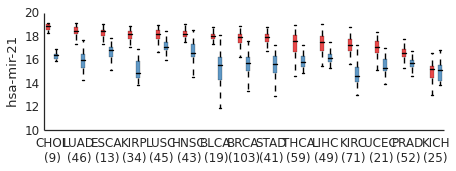

In [15]:
#Do not import
fig, ax = subplots(figsize=(6.5,2.5))
paired_bp_tn_split(matched_mir.ix['hsa-mir-21'], codes, data_type='',
                   ax=ax)
fig.tight_layout()

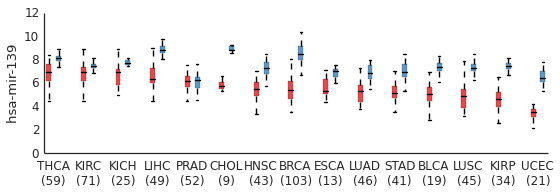

In [14]:
#Do not import
paired_bp_tn_split(matched_mir.ix['hsa-mir-139'], codes, data_type='')

### Methylation Screen

In [16]:
dx_meth = binomial_test_screen(matched_meth, fc=1.)
dx_meth = dx_meth[dx_meth.num_dx > 300]

In [17]:
dx_meth.sort('p').head()

,num_ox,num_dx,frac,p
Hybridization REF,,,,
cg10216717,22,704,0.03,6.95e-171
cg06570224,680,704,0.97,5.87e-168
cg12597389,679,704,0.96,1.60e-166
cg27166177,27,704,0.04,1.05e-163
cg17811434,29,704,0.04,5.94e-161


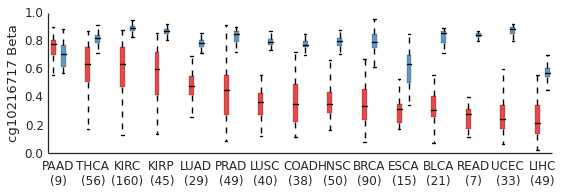

In [18]:
#Do not import
paired_bp_tn_split(matched_meth.ix['cg10216717'], codes, data_type='Beta')

#### Plot disributions of fraction upregulated statistic 

We are going to want to reuse this plot so here I'm wrapping it in a function.

In [19]:
def fig_1e(ax):
    draw_dist(dx_meth.frac, ax=ax, lw=2.5)
    draw_dist(dx_rna.frac, ax=ax, lw=2.5, bins=200)
    draw_dist(dx_mir.frac, ax=ax, lw=2.5, bins=100)


    ax.set_yticks([])
    ax.set_xticks([0,.5,1])
    ax.set_ylabel('Density')
    ax.set_xlabel('Fraction')
    ax.legend(('Methylation','mRNA','miRNA'), frameon=False)
    prettify_ax(ax)
    return ax

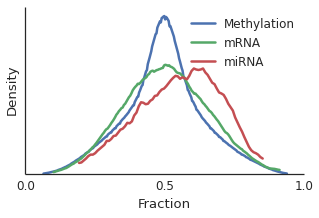

In [20]:
#Do not import
fig, ax = subplots(1,1, figsize=(5,3))
fig_1e(ax);